**Amirreza Hosseini** *9820363* <br>
HW2

In [9]:
import numpy as np 
from numpy import log,dot,exp,shape
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*reading the data*

In [10]:
df = pd.read_csv('.\\Ozone Level Detection.data', sep=',', header=None)

*handling the missing values*

In [11]:
#change every ? to random number
df.replace('?', random(), inplace=True)

*K fold cross validation* <br>
partition df into 3 parts <br>
train, test, validation <br>
K=3 <br>
70% for train <br>
20% for test <br>
10% for validation

In [12]:
train = df.iloc[:int(len(df)*0.7)]
test = df.iloc[int(len(df)*0.7):int(len(df)*0.9)]
validation = df.iloc[int(len(df)*0.9):]

*extracting x & y from data* <br>
also remove the date filed from data and fix the data

In [13]:
y_tr=train.iloc[:,73:74]
X_tr=train.iloc[:, 1:-1]

y_te=test.iloc[:,73:74]
X_te=test.iloc[:, 1:-1]

y_val=validation.iloc[:,73:74]
X_val=validation.iloc[:, 1:-1]

#convert X_tr to np.array
X_tr = np.array(X_tr)
#convert y_tr to np.array
y_tr = np.array(y_tr)

#convert x_te to np.array
X_te = np.array(X_te)

#convert y_te to np.array
y_te = np.array(y_te)

#convert X_val to np.array
X_val = np.array(X_val)

#convert y_val to np.array
y_val = np.array(y_val)

#remove the string from x_tre
X_tr = X_tr.astype(float)
#remove the string from y_tre
y_tr = y_tr.astype(int)

#remove the string from x_te
X_te = X_te.astype(float)

#remove the string from y_te
y_te = y_te.astype(int)

#remove the string from x_val
X_val = X_val.astype(float)

#remove the string from y_val
y_val = y_val.astype(int)

*Standardization* <br>
Standardization is the process of scaling data around the mean with a unit standard deviation. <br>
we need this for this type of data 


In [14]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

call the above function for our data

In [15]:
standardize(X_tr)
standardize(X_te)
standardize(X_val)

**Logistic Regression class** <br>
*included:* <br>
Sigmoid Function <br>
Cost Function <br>
Gradient Descent <br>
Prediction

In [16]:
class LogisticRegression:
    def __init__(self,lr=0.001,num_iter=1000,fit_intercept=True,verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose


    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def GD(self,X,y,learning_rate=0.001,epoch=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
            
        cost_list = np.zeros(epoch,)
        for i in range(epoch):
            z = dot(X,weights)
            grad = dot(X.T,(self.sigmoid(z)-y))/len(y)
            weights = weights - learning_rate*grad
            cost_list[i] = cost(weights)
            
        self.weights = weights
        return cost_list
    
    #threshold for the sigmoid function is 0.5
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
    
    def accuracy(self,y,y_hat):
        count = 0
        for i in range(len(y)):
            if y[i] == y_hat[i]:
                count += 1
        return count/len(y)

*create instance from class* <br>
and run the model

In [17]:
obj1 = LogisticRegression()
model= obj1.GD(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

print the accuracy of output

In [18]:
#print the accuracy
print("Accuracy on training set:",obj1.accuracy(y_tr,y_train))
print("Accuracy on test set:",obj1.accuracy(y_te,y_pred))
print("Accuracy on validation set:",obj1.accuracy(y_val,obj1.predict(X_val)))

Accuracy on training set: 0.9064788732394367
Accuracy on test set: 0.9092702169625246
Accuracy on validation set: 0.9015748031496063


*print avrage and standard deviation of the weights* <br>
we know weights[0] is bias

In [19]:

print("Average of the weights:",np.mean(obj1.weights))
print("Standard deviation of the weights:",np.std(obj1.weights))

Average of the weights: -0.003072009455014844
Standard deviation of the weights: 0.020904895399448745


*plotting sigmoid function*

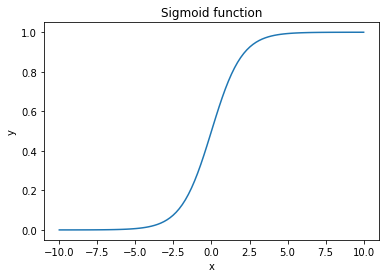

In [23]:
x = np.linspace(-10,10,100)
y = obj1.sigmoid(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid function')
plt.show()

*plotting the cost function*

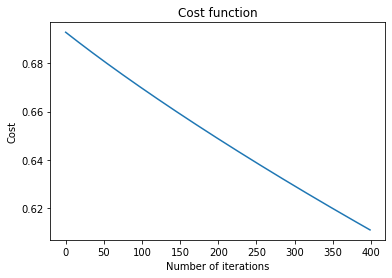

In [20]:
#plotting the cost function
plt.plot(model)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()

*plotting the decision boundary*

ValueError: shapes (6237,3) and (73,1) not aligned: 3 (dim 1) != 73 (dim 0)

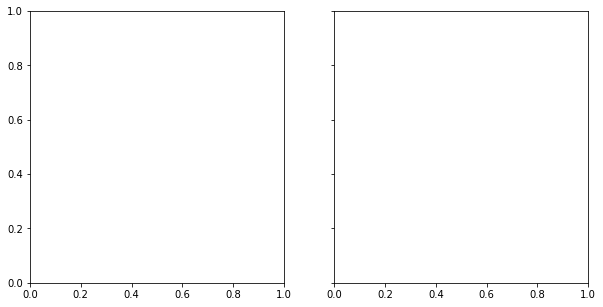

In [21]:
x_min, x_max = X_tr[:, 1].min() - 1, X_tr[:, 1].max() + 1
y_min, y_max = X_tr[:, 2].min() - 1, X_tr[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 5))
for idx, clf, tt in zip([0, 1], [obj1, obj1], ['Logistic Regression', 'Logistic Regression']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_tr[y_tr==0, 1], X_tr[y_tr==0, 2], c='blue', marker='^')
    axarr[idx].scatter(X_tr[y_tr==1, 1], X_tr[y_tr==1, 2], c='red', marker='o')
    axarr[idx].set_title(tt)
plt.show()